In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from bin.basket_scoring import read_basket_scores

In [3]:
results_folder = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT"
use_zscored_input = True

In [4]:
df = read_basket_scores(results_folder, z_scored=use_zscored_input)
df.head()

,ABL,AKT,ALK,ALT_EJ,AURK,AXL,Apoptosis,BER,Biomarker,CDK4_6 activity,...,RHO_GTPases,SFKs,SHH,SHP2,SRC,TGFb,Tumorantigens,VEGFR,WNT,cellcycle
Sample,,,,,,,,,,,,,,,,,,,,,
H021-13A4TF-M1,-0.132245,-2.275939,0.321754,0.465184,-0.667008,0.265525,1.279335,0.000000,1.501138,0.487155,...,-0.409229,0.181788,2.367921,-0.514596,0.638262,-2.317947,0.193937,-1.398312,-0.069268,-0.715117
H021-188HA2-T2,0.308462,0.632235,-0.008278,-0.595651,1.108613,-0.001690,0.254197,-2.299776,-0.545625,0.752468,...,0.084632,-0.895467,-1.494269,-0.619998,-0.858539,-0.420200,0.104153,1.447493,0.654836,0.994156
H021-192LV1-M1,-0.212156,0.445418,-0.066680,-0.352538,0.937410,1.050853,1.205535,0.000000,0.239471,1.013072,...,0.773983,0.722832,0.866691,-0.693350,-0.352821,-0.449356,-1.286754,1.671367,0.428806,1.115597
H021-192LV1-M2,-0.491774,0.328398,-0.373172,0.345623,1.608493,0.924870,-1.559170,0.000000,-0.551840,2.226152,...,0.303502,-0.256423,0.597383,-0.549307,-0.518603,1.348313,-1.319198,1.385874,-0.629621,0.814215
H021-1AV9F5-T1-Q1,-0.882543,-0.182137,0.865521,0.422203,0.621314,1.006338,1.336166,0.000000,1.501138,-0.341790,...,0.240418,0.437853,-0.017063,0.056277,0.071268,-2.354174,0.057050,-0.088083,0.121232,-0.209393


In [39]:
exclude_baskets = [
    "ALT_EJ",
    "Apoptosis",
    "BER",
    "Biomarker",
    "FA",
    "HR",
    "IFN",
    "Immune_checkpoints",
    "Infiltration_Inflammation",
    "NER",
    "NHEJ",
    "RHO_GTPases",
    "SHP2",
    "TGFb",
    "Tumorantigens",
    "MMR",
    "MAPKregulation",
    "MTOR regulation"
]
df = df.loc[:, ~df.columns.isin(exclude_baskets)]

In [40]:
# Compute the correlation matrix
corr = df.corr()

/home/matthewt/.cache/pypoetry/virtualenvs/wp3-sample-pipeline-OkE4pj9k-py3.9/lib/python3.9/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


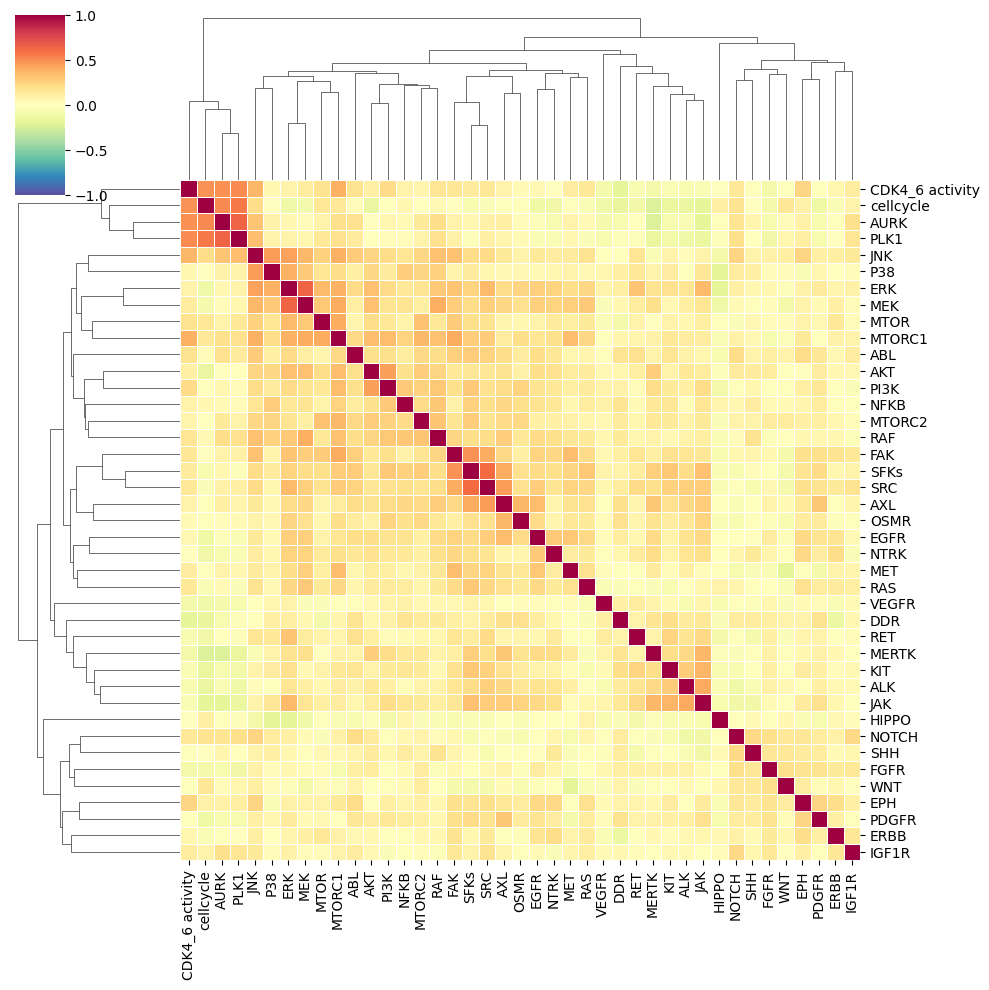

In [41]:
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.color_palette("Spectral_r", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.clustermap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=True, yticklabels=True)

# # Generate a mask for the upper triangle
# mask = np.tril(np.ones_like(corr))
# values = g.ax_heatmap.collections[0].get_array().reshape(corr.shape)
# new_values = np.ma.array(values, mask=mask)
# g.ax_heatmap.collections[0].set_array(new_values)


In [36]:
def plot_correlation_scatter(x, y):
    df[[x, y]].plot.scatter(x=x, y=y)
    correlation = round(df[[x, y]].corr().iloc[0,1], 2)
    plt.title(f'R={correlation}')

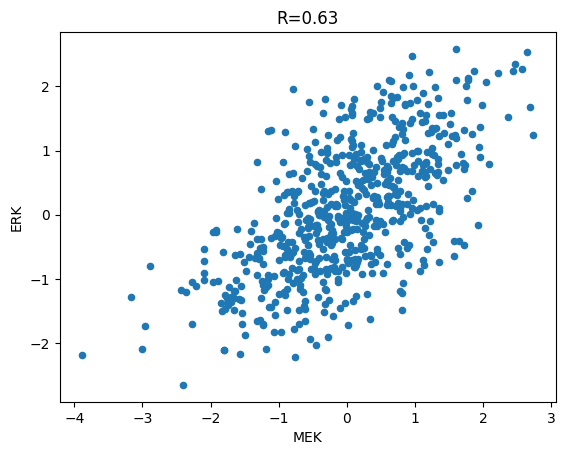

In [37]:
plot_correlation_scatter('MEK', 'ERK')

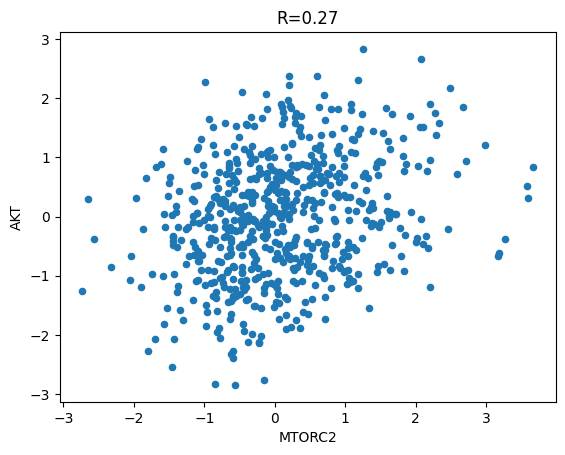

In [38]:
plot_correlation_scatter('MTORC2', 'AKT')